In [2]:
import cv2, os
from skimage import io
import numpy as np
from tqdm import tqdm 
from matplotlib import pyplot as plt

In [59]:
ctrl_type = "RETT"
rett_type = "HPS3042"
chip_type = "All"
home_path = "/groups/4/gaa50089/acd13264yb/Rettsyndrome/Classification"

gaus = 11

ctrl_type = "CTRL"
for chip_type in ["All", "H3K27ac", "CTCF", "Dapi"]:
    image_path = f"{ctrl_type}_{chip_type}"
    data = np.load(f"{home_path}/Datasets/{image_path}.npy", allow_pickle=True)
    print(f"LOAD Datasets/{image_path}.npy {data.shape}")
    data_lr = []
    for i in range(len(data)):
        data_lr.append(cv2.GaussianBlur(data[i], (gaus, gaus), 0))
    data_lr = np.array(data_lr)
    np.save(f"{home_path}/Datasets_LR/{image_path}.npy", data_lr)
    print(f"SAVE Datasets_LR/{image_path}.npy {data_lr.shape} \n")

ctrl_type = "RETT"
for rett_type in ["HPS3042", "HPS3049", "HPS3084", "HPS9999"]:
    for chip_type in ["All", "H3K27ac", "CTCF", "Dapi"]:
        image_path = f"{ctrl_type}_{rett_type}_{chip_type}"
        data = np.load(f"{home_path}/Datasets/{image_path}.npy", allow_pickle=True)
        print(f"LOAD Datasets/{image_path}.npy {data.shape}")
        data_lr = []
        for i in range(len(data)):
            data_lr.append(cv2.GaussianBlur(data[i], (gaus, gaus), 0))
        data_lr = np.array(data_lr)
        np.save(f"{home_path}/Datasets_LR/{image_path}.npy", data_lr)
        print(f"SAVE Datasets_LR/{image_path}.npy {data_lr.shape} \n")

LOAD Datasets/CTRL_All.npy (1723, 500, 500, 3)
SAVE Datasets_LR/CTRL_All.npy (1723, 500, 500, 3) 

LOAD Datasets/CTRL_H3K27ac.npy (1723, 500, 500, 3)
SAVE Datasets_LR/CTRL_H3K27ac.npy (1723, 500, 500, 3) 

LOAD Datasets/CTRL_CTCF.npy (1723, 500, 500, 3)
SAVE Datasets_LR/CTRL_CTCF.npy (1723, 500, 500, 3) 

LOAD Datasets/CTRL_Dapi.npy (1723, 500, 500, 3)
SAVE Datasets_LR/CTRL_Dapi.npy (1723, 500, 500, 3) 

LOAD Datasets/RETT_HPS3042_All.npy (905, 500, 500, 3)
SAVE Datasets_LR/RETT_HPS3042_All.npy (905, 500, 500, 3) 

LOAD Datasets/RETT_HPS3042_H3K27ac.npy (905, 500, 500, 3)
SAVE Datasets_LR/RETT_HPS3042_H3K27ac.npy (905, 500, 500, 3) 

LOAD Datasets/RETT_HPS3042_CTCF.npy (905, 500, 500, 3)
SAVE Datasets_LR/RETT_HPS3042_CTCF.npy (905, 500, 500, 3) 

LOAD Datasets/RETT_HPS3042_Dapi.npy (905, 500, 500, 3)
SAVE Datasets_LR/RETT_HPS3042_Dapi.npy (905, 500, 500, 3) 

LOAD Datasets/RETT_HPS3049_All.npy (1358, 500, 500, 3)
SAVE Datasets_LR/RETT_HPS3049_All.npy (1358, 500, 500, 3) 

LOAD Datasets

LOAD Datasets/RETT_HPS3042_All.npy (905, 500, 500, 3)


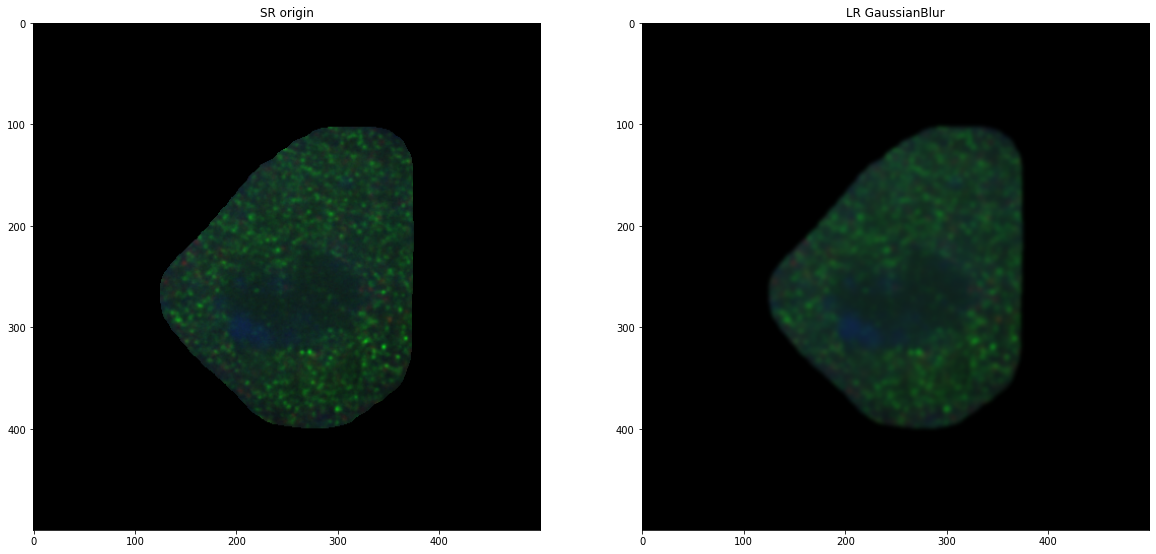

In [61]:
ctrl_type = "RETT"
rett_type = "HPS3042"
chip_type = "All"
home_path = "/groups/4/gaa50089/acd13264yb/Rettsyndrome/Classification"
image_path = f"{ctrl_type}_{rett_type}_{chip_type}"
data = np.load(f"{home_path}/Datasets/{image_path}.npy", allow_pickle=True)
print(f"LOAD Datasets/{image_path}.npy {data.shape}")

img = data[1]
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("SR origin")
plt.imshow(img)

img_blurred = cv2.GaussianBlur(img, (11, 11), 0)  # 5x5是高斯核大小，0是标准差
plt.subplot(1,2,2)
plt.title("LR GaussianBlur")
plt.imshow(img_blurred)

# noise = np.random.normal(0, 10, img.shape)  # 均值0，标准差10
# img_noise = cv2.add(img_blurred, noise.astype('uint8'), dtype=cv2.CV_8UC3)
# plt.subplot(1,3,3)
# plt.title("LR GaussianBlur noise")
# plt.imshow(img_blurred)